In [10]:
import os
import os.path as osp
import mylib.file_utils as fu
from PIL import Image
import numpy as np
import scipy
from scipy import interpolate
import cv2
import matplotlib.pyplot as plt
import torch
from mmcv.runner import CheckpointLoader

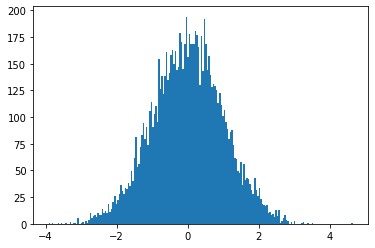

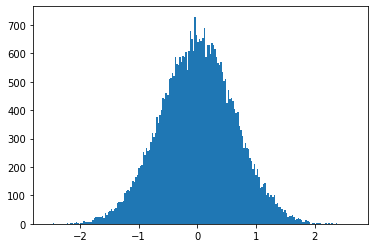

((100, 100),
 (200, 200),
 0.004115583636142616,
 0.9997615166865803,
 0.004115583636142617,
 0.6331560233288988)

In [44]:
a = np.random.normal(size=(100, 100))
b = cv2.resize(a, dsize=(0, 0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR_EXACT)

plt.hist(a.flatten(), bins=200)
plt.show()

plt.clf()
plt.hist(b.flatten(), bins=200)
plt.show()

a.shape, b.shape, a.mean(), a.std(), b.mean(), b.std()

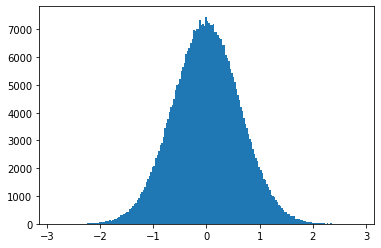

(2000, 200)

In [5]:
a = r'D:\code\latex\PolSAR_SelfSup\fig\post-process.py'
osp.splitext(a)

('D:\\code\\latex\\PolSAR_SelfSup\\fig\\post-process', '.py')

In [3]:
a = torch.tensor([[0.0, 0.6, 0.0, 0.0],
                [0.0, 0.0, 0.4, 0.0],
                [0.0, 0.0, 0.0, 1.2],
                [0.0, 0.0,-0.4, 0.0]])
torch.nonzero(a, as_tuple=True)

(tensor([0, 1, 2, 3]), tensor([1, 2, 3, 2]))

In [3]:
path = r'work_dirs/pbyol_r50_sn6_sar_pro_ep200/20210927_094326/epoch_200.pth'
ckpt = torch.load(path)

In [9]:
online = ckpt['state_dict']
print(len(online))
for k, v in online.items():
    print(k)

1017
online_net.0.stem.0.weight
online_net.0.stem.1.weight
online_net.0.stem.1.bias
online_net.0.stem.1.running_mean
online_net.0.stem.1.running_var
online_net.0.stem.1.num_batches_tracked
online_net.0.stem.3.weight
online_net.0.stem.4.weight
online_net.0.stem.4.bias
online_net.0.stem.4.running_mean
online_net.0.stem.4.running_var
online_net.0.stem.4.num_batches_tracked
online_net.0.stem.6.weight
online_net.0.stem.7.weight
online_net.0.stem.7.bias
online_net.0.stem.7.running_mean
online_net.0.stem.7.running_var
online_net.0.stem.7.num_batches_tracked
online_net.0.layer1.0.conv1.weight
online_net.0.layer1.0.bn1.weight
online_net.0.layer1.0.bn1.bias
online_net.0.layer1.0.bn1.running_mean
online_net.0.layer1.0.bn1.running_var
online_net.0.layer1.0.bn1.num_batches_tracked
online_net.0.layer1.0.conv2.weight
online_net.0.layer1.0.bn2.weight
online_net.0.layer1.0.bn2.bias
online_net.0.layer1.0.bn2.running_mean
online_net.0.layer1.0.bn2.running_var
online_net.0.layer1.0.bn2.num_batches_tracked

In [7]:
a='SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190823162315_20190823162606_tile_7868.tif'
b = a.split('.')
c = b[0].split('.')
b, b[0], c

(['SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190823162315_20190823162606_tile_7868',
  'tif'],
 'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190823162315_20190823162606_tile_7868',
 ['SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190823162315_20190823162606_tile_7868'])

In [2]:
a = np.arange(12).reshape(2,2,3)
b = np.array([[0, 1], [1, 0]]).astype(np.bool8)
c = a[b]
# d = np.tile(b, (2, 1, 1))
# d = np.repeat(b[..., None], 2, axis=-1)
# e = a[d]
# print(a.shape, b.shape, c.shape, d.shape, e.shape)
print(f'a: {a.shape}\n{a}\nb: {b.shape}\n{b}\nc: {c.shape}\n{c}')
print('d: {d.shape}\n{d}')
# print(f'e: {e.shape}\n{e}')
print(f'expanded b:{b[..., None].shape}\n{b[..., None]}')

a: (2, 2, 3)
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
b: (2, 2)
[[False  True]
 [ True False]]
c: (2, 3)
[[3 4 5]
 [6 7 8]]
d: {d.shape}
{d}
expanded b:(2, 2, 1)
[[[False]
  [ True]]

 [[ True]
  [False]]]


In [5]:
img_path = r'/data/csl/SN6_full/SAR-PRO/SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190822092149_20190822092450_tile_1697.tif'
mask_path = r'/data/csl/SN6_sup/slic_mask/SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190822092149_20190822092450_tile_1697.png'
img = Image.open(img_path)
mask = Image.open(mask_path)

In [18]:
nimg = np.asarray(img)
nmask = np.asarray(mask)
nimg.shape, nimg.max(), nimg.min(), nmask.shape, nmask.max(), nmask.min()

((900, 900, 3), 224, 0, (900, 900), 92, 0)

In [15]:
def cat_pil_images(images, axis):
    arrays = [np.asarray(img) for img in images]
    arrays = [arr if arr.ndim==3 else arr[..., None] for arr in arrays]
    array = np.concatenate(arrays, axis=axis)
    return Image.fromarray(array)
mix = cat_pil_images((img, mask), axis=-1)


In [17]:
nmix = np.asarray(mix)
nmix.shape, nmix.max(), nmix.min()

((900, 900, 4), 224, 0)